In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

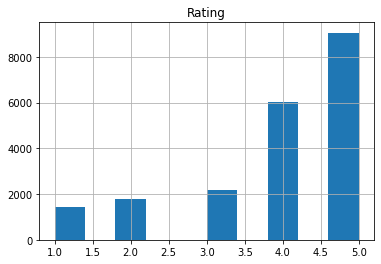

In [3]:
df.hist()

In [4]:
# Reduce each rating by 1 to ensure that the model
# uses the following labels 0, 1, 2, 3, 4
# Each representing only 1 less than the true rating
df['Rating'] = df['Rating'].apply(lambda x: x-1)
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,3
1,ok nothing special charge diamond member hilto...,1
2,nice rooms not 4* experience hotel monaco seat...,2
3,"unique, great stay, wonderful time hotel monac...",4
4,"great stay great stay, went seahawk game aweso...",4


array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

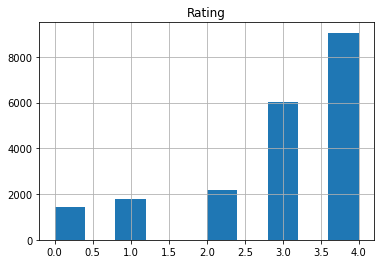

In [5]:
df.hist()

In [6]:
df['Length'] = df['Review'].apply(len)
df.head()

,Review,Rating,Length
0,nice hotel expensive parking got good deal sta...,3,593
1,ok nothing special charge diamond member hilto...,1,1689
2,nice rooms not 4* experience hotel monaco seat...,2,1427
3,"unique, great stay, wonderful time hotel monac...",4,600
4,"great stay great stay, went seahawk game aweso...",4,1281


<AxesSubplot:>

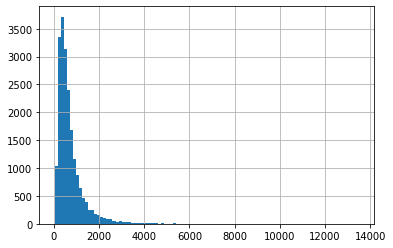

In [7]:
df['Length'].hist(bins=100)

In [8]:
sentences = list(df['Review'])
labels = list(df['Rating'])

X_train, X_test, y_train, y_test = train_test_split(sentences, labels, random_state=0)

df_test = pd.DataFrame({
    'Review': X_test,
    'Rating': y_test
})
df_test.head()

,Review,Rating
0,ehhh better punta cana twice compared hotel st...,1
1,"4 n't think, decided book atenea night stay de...",1
2,awesome time just returned vacation fantastic ...,3
3,"grand oasis wonderful second time, group 20 fr...",4
4,not bad stay stayed hotel family attending jav...,2


In [9]:
df_test.to_csv('test.csv')

In [10]:
df_train = pd.DataFrame({
    'Review': X_train,
    'Rating': y_train
})
df_train.head()

,Review,Rating
0,fabulous hotel mum just returned 4 night stay ...,4
1,romantic international ambience spent honeymoo...,4
2,great hotel location union square stay great 6...,3
3,pretty outside smelly inside beach beautiful p...,1
4,kids loved spent nights hotel wife kids christ...,4


In [11]:
new_df = df_train
new_df['weight'] = 30-(df_train['Rating']*df_train['Rating'])
new_df.head()

,Review,Rating,weight
0,fabulous hotel mum just returned 4 night stay ...,4,14
1,romantic international ambience spent honeymoo...,4,14
2,great hotel location union square stay great 6...,3,21
3,pretty outside smelly inside beach beautiful p...,1,29
4,kids loved spent nights hotel wife kids christ...,4,14


In [12]:
new_df = new_df.sample(frac=0.3, replace=False, weights='weight' , random_state=1)
new_df.head()

,Review,Rating,weight
6375,"great place stay, great place stay looking hot...",3,21
11040,nice hotel overal overall inn opera boutique h...,1,29
2,great hotel location union square stay great 6...,3,21
4636,nice hotel great location nice hotel great loc...,4,14
2243,dissapointing 5 star hotel just got 6 night st...,1,29


array([[<AxesSubplot:title={'center':'Rating'}>,
        <AxesSubplot:title={'center':'weight'}>]], dtype=object)

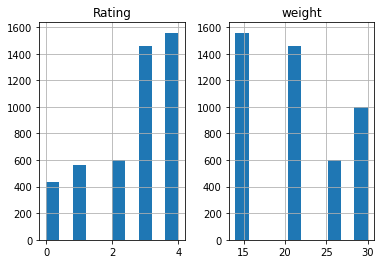

In [13]:
new_df.hist()

In [14]:
new_df.to_csv('to_model.csv')